# Problem Statement:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent.
USA immigration authorities permits foreign workers to come to the United States to work on either a temporary or permanent basis to work in the companies which are looking for hard-working, talented, and qualified individuals.

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

With the employer application increasing every year,The process of reviewing every case is becoming a tedious task.The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval    


# Objective:
1. Analyze the provided visa application data and come out with the best classfication model which can help in facilitating the process of Visa approvel. 
2. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


# Data Description:

- case_id: ID of each visa application
- continent: Information of continent the employee
- education_of_employee: Information of education of the employee
- has_job_experience: Does the employee has any job experience? Y= Yes; N = No
- requires_job_training: Does the employee require any job training? Y = Yes; N = No
- no_of_employees: Number of employees in the employer's company
- yr_of_estab: Year in which the employer's company was established
- region_of_employment: Information of foreign worker's intended region of employment in the US.
- prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
- unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
- full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
- case_status: Flag indicating if the Visa was certified or denied

### Import necessary libraries

In [3]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

### Read the dataset

In [4]:
evisa = pd.read_csv('EasyVisa.csv')

In [5]:
# copying data to another varaible to avoid any changes to original data
data = evisa.copy()

### View the first and last 5 rows of the dataset.

In [6]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset.

In [8]:
data.shape

(25480, 12)

* There are 25480 observations and 12 columns in the dataset

### Check the data types of the columns for the dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations-**
* Most features are Object types.
* There are no missing values in the data.
* As most columns are object type so we need to convert them into the catagorical data.

In [10]:
# As we can see that prevailing wages for some visa application is in hours,week and monthly,
# so to make every prevailing wages in the same format we should convert them to yearly 

def process_prevailing_wages(r):
    if r.unit_of_wage == 'Hour':
        r.prevailing_wage = round(r.prevailing_wage*int(2080),2)
    if r.unit_of_wage == 'Week':
        r.prevailing_wage = round(r.prevailing_wage*int(52),2)
    if r.unit_of_wage == 'Month':
        r.prevailing_wage = round(r.prevailing_wage*int(12),2)    
    return r

df = data.apply(process_prevailing_wages, axis=1)

In [11]:
# Since all the case id are different and it is not giving any actionable inputs, So we can drop it.
# Also prevailing wages has been converted to yearly prevailing wages so no need to keep the unit_of_wages column.
df = df.drop(columns=['case_id'])
df = df.drop(columns=['unit_of_wage'])

In [12]:
for feature in df.columns:
    print(df[feature].value_counts())
    

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Y    14802
N    10678
Name: has_job_experience, dtype: int64
N    22525
Y     2955
Name: requires_job_training, dtype: int64
183      18
854      16
724      16
1476     15
766      15
         ..
95881     1
5749      1
4026      1
5715      1
5718      1
Name: no_of_employees, Length: 7105, dtype: int64
1998    1134
2005    1051
2001    1017
2007     994
1999     870
        ... 
1820       6
1846       4
1822       4
1810       3
1824       2
Name: yr_of_estab, Length: 199, dtype: int64
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
6036.67      2
213616.00    2
93356.03     2
231108.80    2
149907.39    2
     

### Summary of the dataset.

In [13]:
# Convert the object type data into the catagorical type
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   full_time_position     25480 non-null  category
 9   case_status            25480 non-null  category
dtypes: category(7), float64(1), int64(2)
memory usage: 772.6 KB


In [15]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,197391.155253,578591.666301,100.0,47107.965,82839.46,124825.035,14569149.4
full_time_position,25480,2,Y,22773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
case_status,25480,2,Certified,17018,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations-**
* Highest Visa applications are from Asia Continent. 
* Highest Visa application from the applicant which got the Bachelor's degree. 
* Number of emplopyees has minimum employee -26 which is unusual and the difference between third QR and max is very high. 
* The oldest company which filled for Visa has been established in year 1800. 
* NorthEast region is the region for which most Visa has been applied for.
* There is a huge difference between the average (Mean) and Minimum and Maximum prevailing wages, Seems like there are huge outliers exists. 
* Out of 25480 total Visa application 22773 are for full-time position. 
* Out of 25480 Visa application 17018 Visa application are certified. 

In [16]:


df.head(10)


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,1231782.03,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.03,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.39,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.14,Y,Certified
6,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Y,Certified
7,North America,Bachelor's,Y,N,3035,1924,West,869917.98,Y,Denied
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Y,Certified
9,Europe,Doctorate,Y,N,2251,1995,South,67514.76,Y,Certified


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   full_time_position     25480 non-null  category
 9   case_status            25480 non-null  category
dtypes: category(7), float64(1), int64(2)
memory usage: 772.6 KB


### EDA

### Univariate analysis

In [18]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<Figure size 720x360 with 0 Axes>

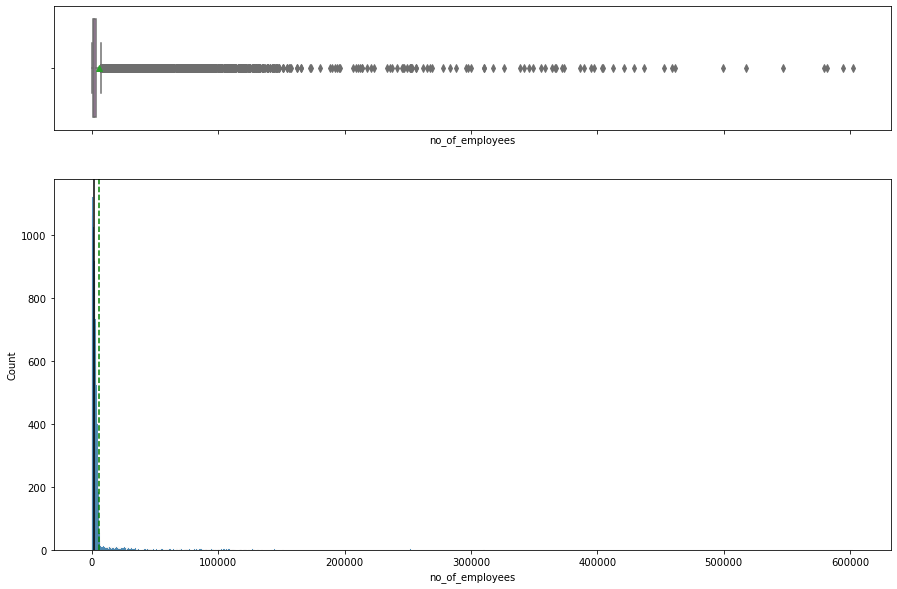

<Figure size 720x360 with 0 Axes>

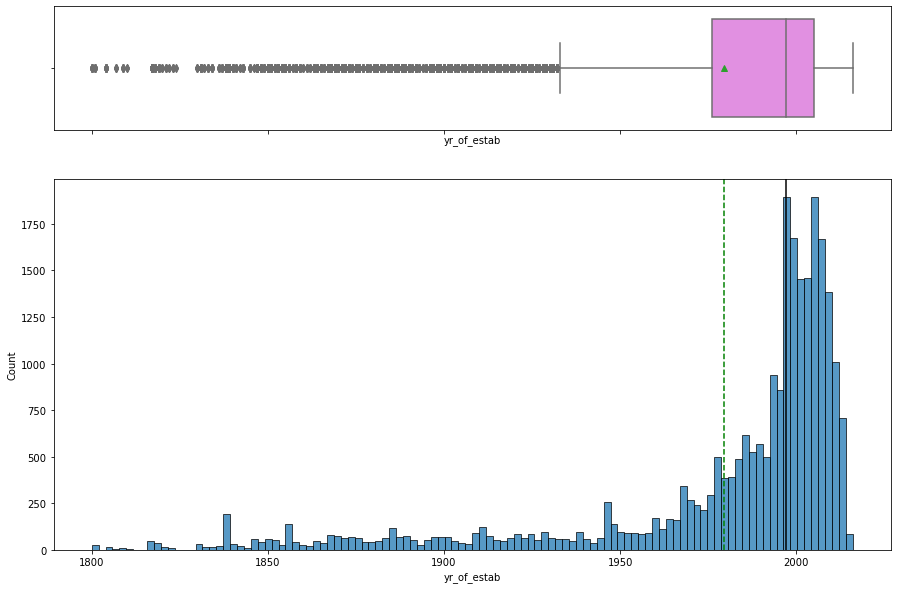

<Figure size 720x360 with 0 Axes>

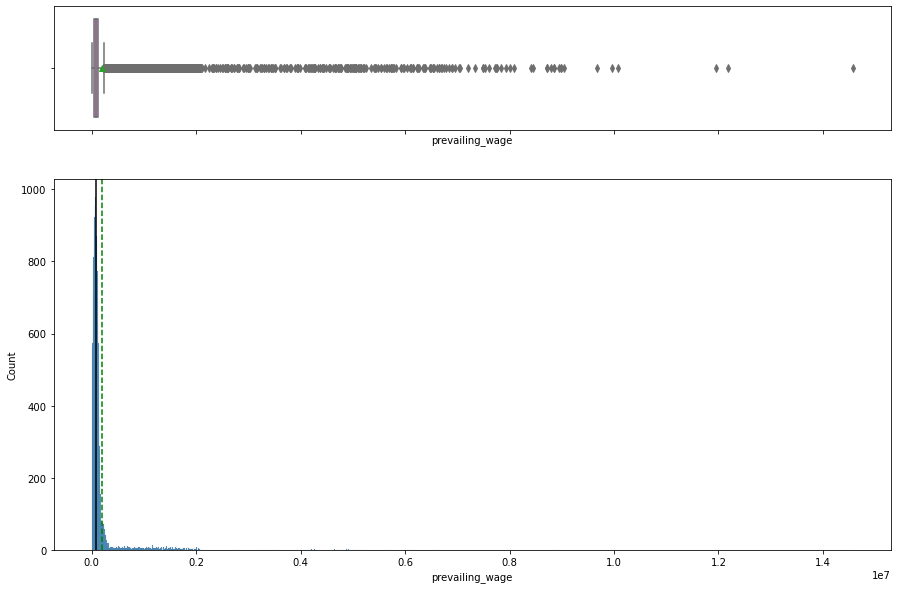

In [19]:
for column in df.columns[df.dtypes != 'category']:
    plt.figure(figsize=(10, 5))
    histogram_boxplot(df, column)
    plt.show()

### Observations

* The outliers present to the right indicate that Number of employees have higher count for some companies. 
* The year of establishment is left skewed. 
* Prevailing wages have outliers and skewed to right.


In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<Figure size 504x288 with 0 Axes>

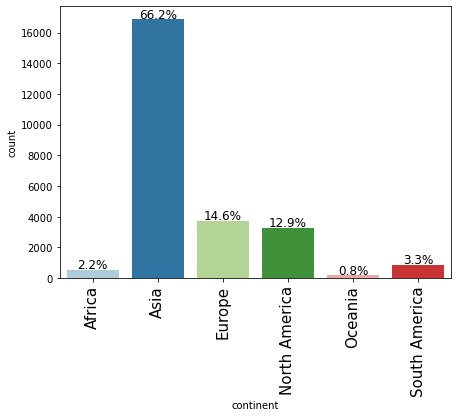

<Figure size 504x288 with 0 Axes>

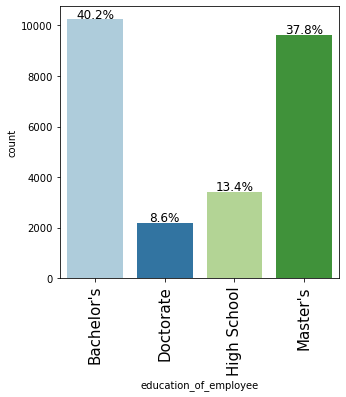

<Figure size 504x288 with 0 Axes>

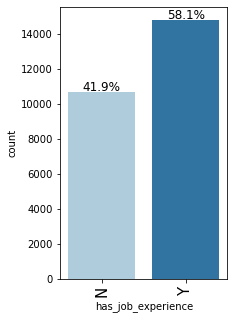

<Figure size 504x288 with 0 Axes>

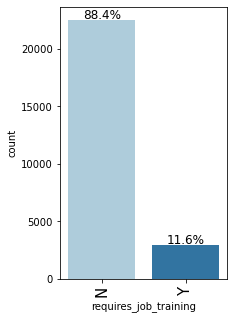

<Figure size 504x288 with 0 Axes>

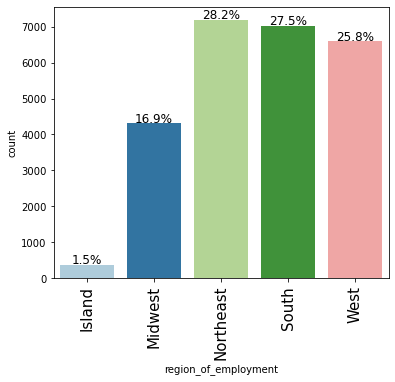

<Figure size 504x288 with 0 Axes>

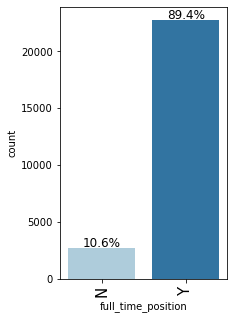

<Figure size 504x288 with 0 Axes>

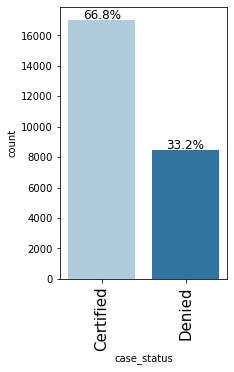

In [21]:
for column in df.columns[df.dtypes == 'category']:
    plt.figure(figsize=(7, 4))
    labeled_barplot(df,column,perc=True)
    plt.show()


* 66.2% Visa applicants are from Asia continent. 
* Majority of visa application's received by people which have education level of Bachelors and Masters degree i.e. 40% and 38%. 
* 58% of the visa applicants has previous job experience v/s 41% applicants with no prior experience. 
* 90% Visa application has been received for fulltime positions. 
* 67% Visa application has been certified V/S 33% visa put into the denied category. 


## Bivariate Analysis

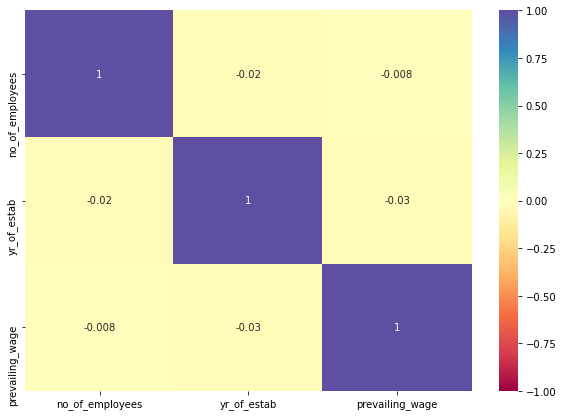

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

* No significant corelations among the features.  


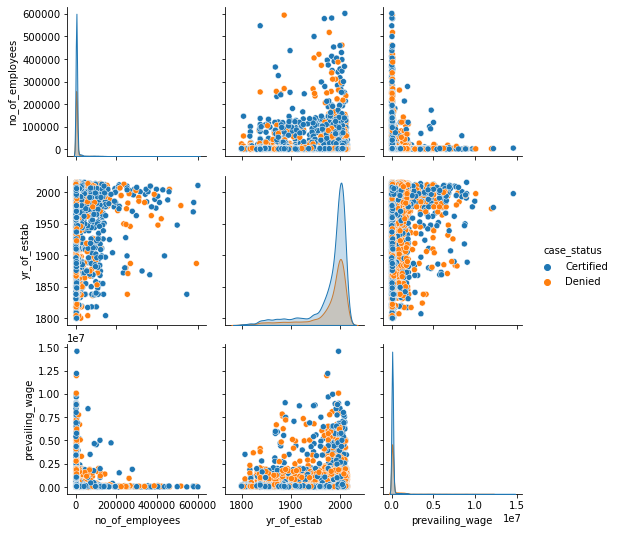

In [23]:
#Pair plot
sns.pairplot(df,hue='case_status')
plt.show()

In [24]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   full_time_position     25480 non-null  category
 9   case_status            25480 non-null  category
dtypes: category(7), float64(1), int64(2)
memory usage: 772.6 KB


case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


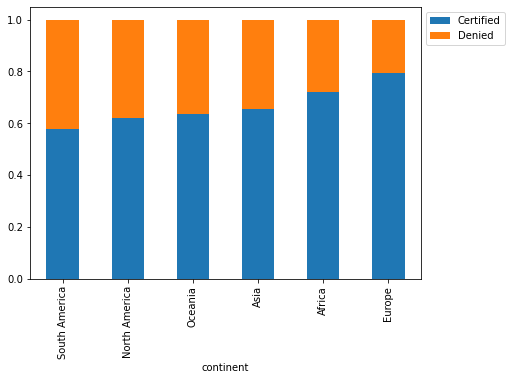

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


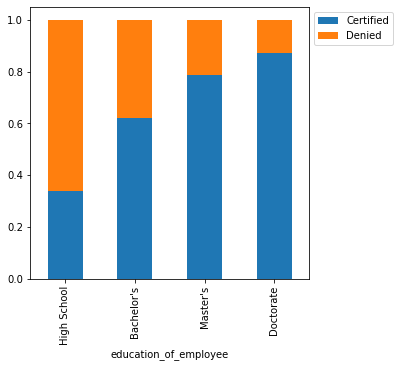

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


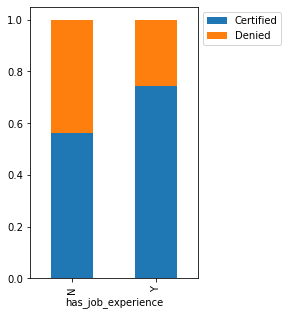

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


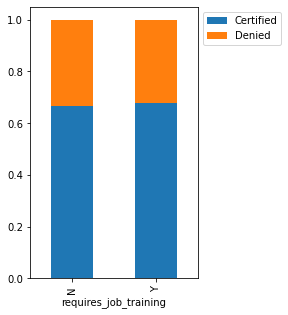

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


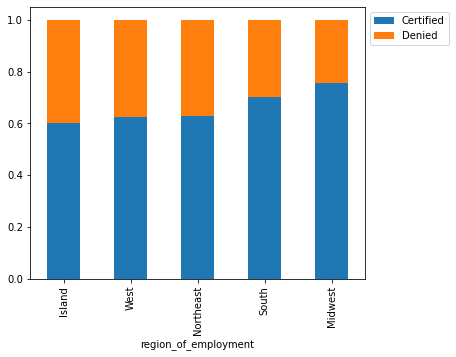

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


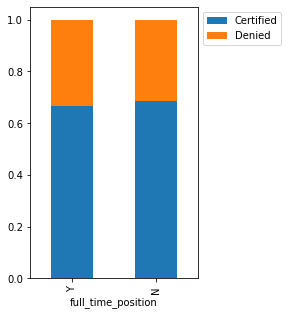

In [26]:
ncolumns = [
    "continent",
    "education_of_employee",
    "has_job_experience",
    "requires_job_training",
    "region_of_employment",
    "full_time_position"
    
]
for column in ncolumns :
    stacked_barplot(df, column, "case_status")

### Observations
* Asia continet has most visa applications, South america has only 852 visa applications but with highest denial rate almost 42%. 
* Europe has 3732 visa application with the lowest denial rate almost 20%
* Highest visa applicants are having Bachelor's degree following by High School, Masters and Doctorate Degree. 
* Applicants with Doctorate degree has least percentage of Visa denial.
* Applicants with prior job experience have a less chance of visa denial than applicants who dont have any prior job experience. 
* Applicants which requires no training or with skill set have more chances of their visa get certified. 
* Companies prefer applicants which requires no job training so that employees can be productive from day 1. 
* NorthEast receives more visa applicants that depicts that there is more demand for high skil workers in that area, followed by west and south. 
* Majority of the applicants applied Visa application for fulltime jobs.


## Binning of Year of Establishment

In [28]:
# First, we will bin the ram data and convert into category

# Binning and addition of custom labels
df['binned_year'] = pd.cut(
    df['yr_of_estab'], [-np.inf,2000, 2010, 2021, np.inf], 
    labels = ["Till 2000", "2001 to 2010", '2011 to 2021',"over 2021"]
)

df.drop(['yr_of_estab'], axis=1, inplace=True)
df['binned_year'].value_counts(dropna=False)

Till 2000       15817
2001 to 2010     7858
2011 to 2021     1805
over 2021           0
Name: binned_year, dtype: int64

## Outlier treatment 

In [29]:
## As prevailing wages has many outliers so lets do the outlier treatment for prevailing wages.
#Log transformation of the prevailing wage to ensure we get a treated column...
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [30]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

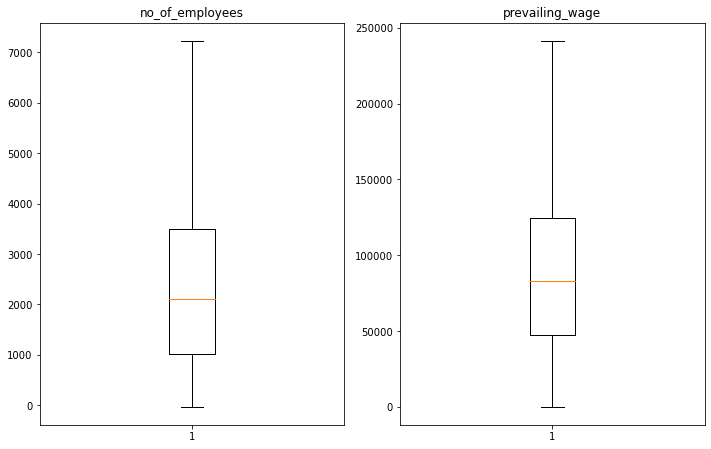

In [31]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [32]:
#One hot columns to convert all the catagorical data into the classification data.
oneHotCols = [
    "continent",
    "education_of_employee",
    "has_job_experience",
    "region_of_employment",
    "requires_job_training",
    "full_time_position",
    "binned_year"
]

newdf = pd.get_dummies(df, columns=oneHotCols, drop_first=True)
newdf.head(10)


,no_of_employees,prevailing_wage,case_status,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,has_job_experience_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,requires_job_training_Y,full_time_position_Y,binned_year_2001 to 2010,binned_year_2011 to 2021,binned_year_over 2021
0,7227,241400.64,Denied,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
1,2412,83425.65,Certified,1,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,0
2,7227,122996.86,Denied,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,0
3,98,83434.03,Denied,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,1082,149907.39,Certified,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
5,2339,78252.14,Certified,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
6,4985,53635.39,Certified,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7,3035,241400.64,Denied,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
8,4810,74362.19,Certified,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
9,2251,67514.76,Certified,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0


In [33]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   no_of_employees                    25480 non-null  int64   
 1   prevailing_wage                    25480 non-null  float64 
 2   case_status                        25480 non-null  category
 3   continent_Asia                     25480 non-null  uint8   
 4   continent_Europe                   25480 non-null  uint8   
 5   continent_North America            25480 non-null  uint8   
 6   continent_Oceania                  25480 non-null  uint8   
 7   continent_South America            25480 non-null  uint8   
 8   education_of_employee_Doctorate    25480 non-null  uint8   
 9   education_of_employee_High School  25480 non-null  uint8   
 10  education_of_employee_Master's     25480 non-null  uint8   
 11  has_job_experience_Y               25480 

## Model Building - Approach
1. Data preparation
2. Split the data into the train and test set.
3. Train models on the training data.
4. Try to improve the model performance using hyperparameter tuning.
5. Test the performance on the test data.

## Split Data

In [34]:
X = newdf.drop('case_status', axis=1)
y = newdf['case_status'].apply(lambda x : 0 if x=='Denied' else 1 )

In [35]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 20) (7644, 20)


**The Stratify arguments maintain the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [36]:
y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [37]:
y_test.value_counts(1)

1    0.667844
0    0.332156
Name: case_status, dtype: float64

## Model evaluation criterion

### The model can make wrong predictions as:
1. Predicting a Visa application qualifies for "Certified" whereas it should be "Denied" .
2. Predicting a Visa application should be "Denied" whereas it should be eligible for "Certified" .

### Which case is more important? 
1. If the model predicts a that a Visa application qualifies for "Certified" whereas the applicant does not have enough experience and education background and it is supposed to be "Denied".In this case Company would incurr the loss in hiring a resource which is not matching with the right skillset and job duties.
2. If the model predicts a that a Visa application qualifies for "Denied" whereas the applicant have enough experience and education background and it is supposed to be "Certified".In this case Company would incurr the loss in loosing a skillfull resource and loss of revenue.

### Which metric to optimize?
* We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

**Let's define a function to provide metric scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [38]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [39]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999383  0.999077        1.0  0.999538
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.657378  0.733007   0.748699  0.74077


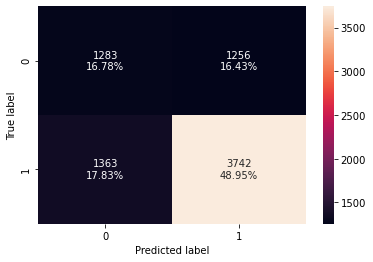

In [40]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

* The decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [41]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.66,1:0.33},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=2,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.66, 1: 0.33}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999383  0.999077        1.0  0.999538
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.657378  0.733007   0.748699  0.74077


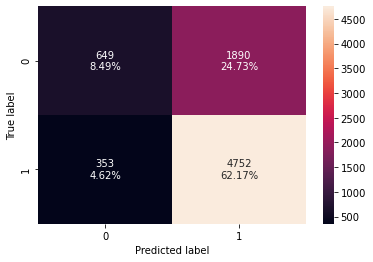

In [42]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

* The overfitting has reduced but the test f1-score has also decreased.
* Let's try some other models.

## Random Forest Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999327  0.999161   0.999832  0.999496
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.703166  0.819001   0.756605  0.786568


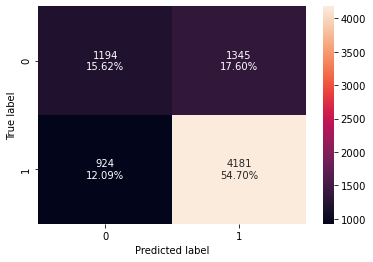

In [43]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

* Random forest is giving a slightly higher test f1-score than decision trees but it is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.
* Accuracy, Recall and Precision are slightly improved on testing data. 

### Hyperparameter Tuning

In [44]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.66,1:0.33},random_state=1,oob_score=True,bootstrap=True)



parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=2,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.66, 1: 0.33},
                       max_features=0.6000000000000001, max_samples=0.3,
                       min_samples_leaf=5, n_estimators=250, oob_score=True,
                       random_state=1)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.779435  0.82028   0.844963  0.832439
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.723051  0.786484   0.796311  0.791367


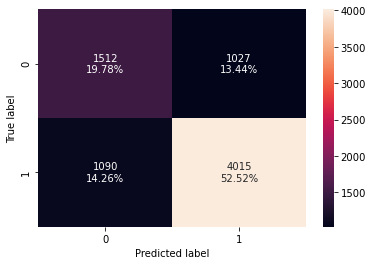

In [45]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

* The overfitting has reduced significantly and the model performance has improved.
* The test recall and test f1-score have increased.

## Bagging Classifier

   Accuracy    Recall  Precision        F1
0  0.982675  0.983799   0.990199  0.986989
   Accuracy    Recall  Precision       F1
0  0.682758  0.765328   0.761005  0.76316


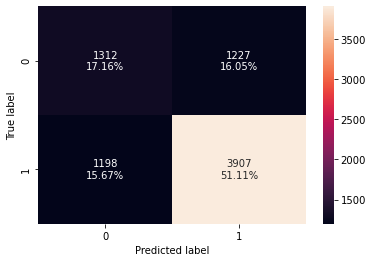

In [46]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

* Bagging classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [47]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=2,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=40,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0  0.993048  0.997818   0.991823  0.994811
   Accuracy    Recall  Precision        F1
0  0.714809  0.875416   0.743223  0.803922


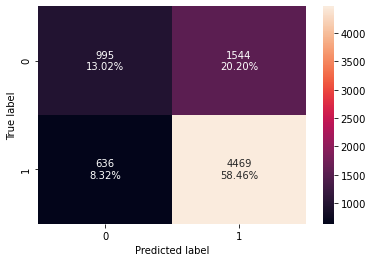

In [48]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

* The model performance has improved after hyperparameter tuning.
* The Test Recall has improved to 0.87 and F1 score has 0.80 post tuning
* Let's try now try boosting models.

## AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0  0.732395  0.880635   0.757911  0.814677
   Accuracy    Recall  Precision        F1
0  0.728938  0.879138   0.755174  0.812455


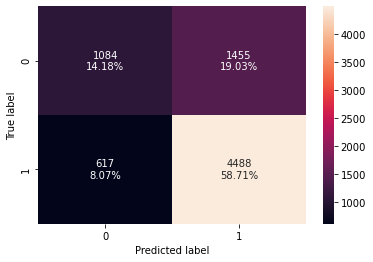

In [64]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* Adaboost is giving more generalized performance than previous models though f1_score is little bit increased on testing data. 

### Hyperparameter Tuning

In [51]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=2,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.4, n_estimators=10, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.745907  0.879627    0.77182  0.822205
   Accuracy    Recall  Precision        F1
0  0.739142  0.880118   0.764766  0.818397


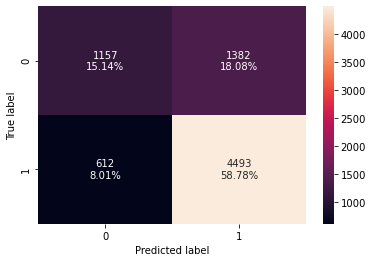

In [52]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

* The model test Recall has slightly reduced but in test post hyper tuning but the F1 score has improved
* The model gives a precision of 0.76 for test post tuning

## Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.750673  0.874507   0.779207  0.824111
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.737441  0.872282   0.766701  0.816091


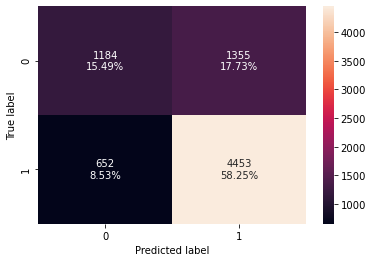

In [53]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* The gradient boosting classifier is not overfitting the training data
* The the Train and Test scores are pretty much close.

### Hyperparameter Tuning

In [54]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=2,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.739628  0.907916   0.753046  0.823261
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.728938  0.901665   0.745667  0.816279


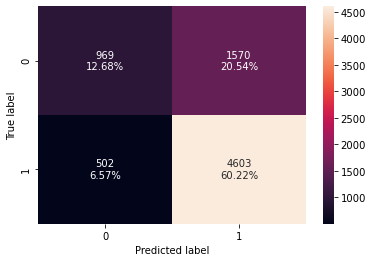

In [55]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* There is a marginal improvement in test recall and F1 scores post tuning
* There is lesser overfitting after the performance of grid search 

## XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.826082  0.916898   0.837975  0.875661
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.729199  0.854261   0.766837  0.808191


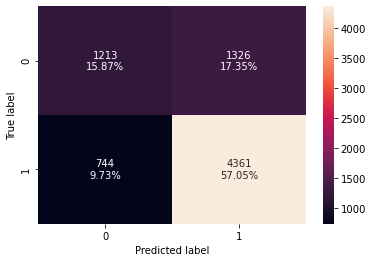

In [56]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* xgboost classifier is not overfitting and training and test performence are significantly improved.
* Let's try hyperparameter tuning and see if the model performance improves further.  

### Hyperparameter Tuning

In [57]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=2,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=30, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.751233  0.894653   0.770087  0.827709
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.735217  0.888345   0.757222  0.817559


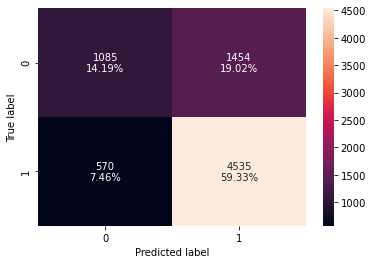

In [58]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* The Accuracy is reduced and the Test Recall and F1 scores have improved. 
*  The Post Tuned Test recall is 0.908 which is the best test recall across all the other models

## Stacking Classifier

In [59]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.66,
                                                                     1: 0.33},
                                                       max_features=0.6000000000000001,
                                                       max_samples=0.3,
                                                       min_samples_leaf=5,
                                                       n_estimators=250,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=1,
                                                           random_state=1,
                                       

Training performance:
    Accuracy   Recall  Precision        F1
0  0.766708  0.88735    0.78947  0.835553
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.737572  0.871694   0.767109  0.816065


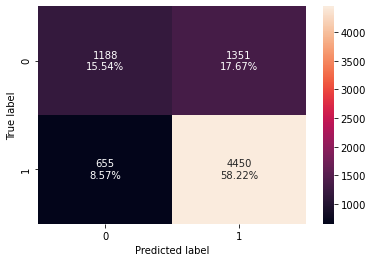

In [60]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* The stacking classifier is giving a different performance as compared to XGBoost 
* The confusion matrix shows that there is lesser overfitting and we have comparable Recalls and F1 across Training and Testing

## Comparing all models

In [61]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.999383,0.999383,0.999327,0.779435,0.982675,0.993048,0.732395,0.745907,0.750673,0.739628,0.826082,0.751233,0.766708
Recall,0.999077,0.999077,0.999161,0.820280,0.983799,0.997818,0.880635,0.879627,0.874507,0.907916,0.916898,0.894653,0.887350
Precision,1.000000,1.000000,0.999832,0.844963,0.990199,0.991823,0.757911,0.771820,0.779207,0.753046,0.837975,0.770087,0.789470
F1,0.999538,0.999538,0.999496,0.832439,0.986989,0.994811,0.814677,0.822205,0.824111,0.823261,0.875661,0.827709,0.835553


In [62]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.657378,0.657378,0.703166,0.723051,0.682758,0.714809,0.728938,0.739142,0.737441,0.728938,0.729199,0.735217,0.737572
Recall,0.733007,0.733007,0.819001,0.786484,0.765328,0.875416,0.879138,0.880118,0.872282,0.901665,0.854261,0.888345,0.871694
Precision,0.748699,0.748699,0.756605,0.796311,0.761005,0.743223,0.755174,0.764766,0.766701,0.745667,0.766837,0.757222,0.767109
F1,0.740770,0.740770,0.786568,0.791367,0.763160,0.803922,0.812455,0.818397,0.816091,0.816279,0.808191,0.817559,0.816065


* The majority of the models are overfitting the training data in terms of f1-score and Recall but become better post tuning
* The XG Boost Classifier Tuned is giving the highest recall-score on the test data and is comparable to the training scores (indicating less overfitting)
* The Ada Boost Classifier tuned has given the second-highest test f1-score and Recall score  

### Feature importance of Tuned Random Forest

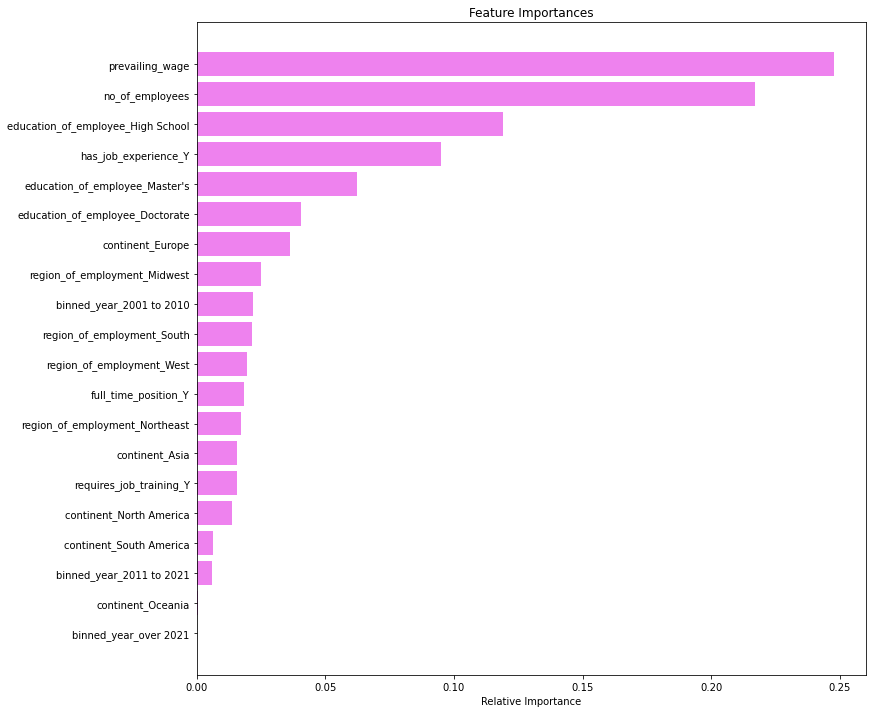

In [63]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Prevailing wages are is the main factor for ensuring if the visa application will be approved or not. 
* Number of employees in the company is second most deciding factor which can impact the visa application.
* Education of the Employee High School is third most important feature in identifying if the application will be certified or denied.
* Job Experience is the next most important feature in identifying if the application will be certified or denied. 
* Education of the Employee Masters and Doctrate are the next two important features in identifying if the application will be certified or denied. 
* Continent Europe is the next most important factor for determining if the application will be certified or denied
* Region of employment Midwest is the next important feature for determination if Visa application can be approved or not.


## Conclusion:

## Conclusion:

- Based on our analysis, we can say that the application Certification (approval) has the following features in comparison to the Denial (visa not approved): 
    - Prevailing wages. 
    - No of employees in the company. 
    - High School education of the applicant. 
    - Job Experience. More experienced applicant has a better chance of approval. 
    - Masters degree of the applicant.
    - Doctrate of the applicant.
    - Origin continent of the person ( Applicants from Europe has a higher chance of approval).
    - Region of the employment where candidate is supposed to work i.e. Midwest has most chances. 